In [30]:
import numpy as np
import pandas as pd
import pickle

#####
# import relevant bits from keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras import regularizers
from keras import optimizers

from sklearn.preprocessing import StandardScaler
import keras
from matplotlib import pyplot as plt
#####
# import relevant bits from sklearn

from sklearn.model_selection import train_test_split

from keras.models import load_model
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

import seaborn as sns


# Prepare Data

## load

In [2]:
data = pd.read_pickle('final_classification_yearly.pkl') # data_final = pd.read_pickle(folder + '/data_withInd.pkl')

In [3]:

y = data['Code_numeric']
X = data.drop(['firm','Description','Code',"Code_numeric"],axis = 1)


## convert Y to one-hot encoding

In [4]:
ycat = keras.utils.to_categorical(y,num_classes = len(np.unique(y)))

## split into train and test

In [5]:
# split training into 
X_train, X_test, y_train, y_test = train_test_split(X, ycat, test_size=0.2)

# then split the test set into dev and test
X_test,X_dev, y_test,y_dev = train_test_split(X_test,y_test,test_size = 0.5)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_dev = scaler.fit_transform(X_dev)
X_test  = scaler.fit_transform(X_test)

/lfs/trinity/0/brian/Anaconda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/lfs/trinity/0/brian/Anaconda/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/lfs/trinity/0/brian/Anaconda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/lfs/trinity/0/brian/Anaconda/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/lfs/trinity/0/brian/Anaconda/lib/python3.7/site-packages/sk

## now load our models
Make it a sequential model.

In [6]:
model = load_model('nn_adam_0435DO_decay1e6.h5')


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


## make our predicts

In [16]:
preds = model.predict(X_test)
preds_numeric = np.argmax(preds,axis = 1)

y_test_numeric = np.argmax(y_test,axis=1)

In [17]:
print(preds_numeric)
print(y_test_numeric)
print(np.sum(preds_numeric==y_test_numeric)/y_test_numeric.shape[0])

[11  6  5 ... 11  5  2]
[ 8 14  5 ... 11  5  2]
0.5011901065921557


In [27]:
precision_recall_fscore_support(preds_numeric,y_test_numeric,average='macro')

(0.3098691919020473, 0.7991074258030826, 0.3814104195483471, None)

In [ ]:
# compute precision and recall
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

In [63]:
# confusion matrix
matrix = confusion_matrix(preds_numeric, y_test_numeric)

colsums = np.sum(matrix,axis=1).reshape(matrix.shape[0],1)

normd = matrix*1./colsums


Text(0.5, 87.0, 'Predicted')

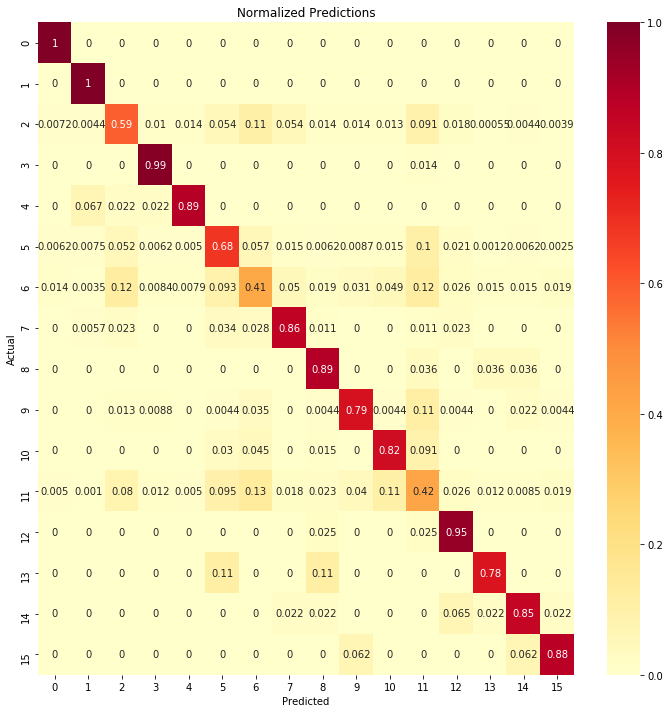

In [69]:
plt.figure(figsize=(12,12))
ax0 = plt.subplot()
sns.heatmap(normd,vmin = np.min(normd),vmax = np.max(normd),cmap = 'YlOrRd',annot=True)
ax0.set_title("Normalized Predictions");ax0.set_ylabel("Actual");ax0.set_xlabel('Predicted')


In [68]:
print(np.unique(data.Description))

['ACCOMMODATION AND FOOD SERVICE ACTIVITIES'
 'ADMINISTRATIVE AND SUPPORT SERVICE ACTIVITIES'
 'AGRICULTURE, FORESTRY AND FISHING' 'ARTS, ENTERTAINMENT AND RECREATION'
 'CONSTRUCTION' 'ELECTRICITY,  GAS, STEAM AND AIR CONDITIONING SUPPLY'
 'HUMAN HEALTH AND SOCIAL WORK ACTIVITIES' 'INFORMATION AND COMMUNICATION'
 'MANUFACTURING' 'MINING AND QUARRYING' 'OTHER SERVICE ACTIVITIES'
 'PROFESSIONAL, SCIENTIFIC AND TECHNICAL ACTIVITIES'
 'REAL ESTATE ACTIVITIES' 'TRANSPORTATION AND STORAGE'
 'WATER SUPPLY, SEWERAGE, WASTE MANAGEMENT AND REMEDIATION ACTIVITIES'
 'WHOLESALE AND RETAIL TRADE, REPAIR OF MOTOR VEHICLES AND MOTORCYCLES']


In [51]:
print(data.Description.value_counts()/data.shape[0])

WHOLESALE AND RETAIL TRADE, REPAIR OF MOTOR VEHICLES AND MOTORCYCLES    0.236079
MANUFACTURING                                                           0.189128
PROFESSIONAL, SCIENTIFIC AND TECHNICAL ACTIVITIES                       0.167955
CONSTRUCTION                                                            0.125951
TRANSPORTATION AND STORAGE                                              0.053170
REAL ESTATE ACTIVITIES                                                  0.050821
INFORMATION AND COMMUNICATION                                           0.043991
ADMINISTRATIVE AND SUPPORT SERVICE ACTIVITIES                           0.027372
ACCOMMODATION AND FOOD SERVICE ACTIVITIES                               0.021256
OTHER SERVICE ACTIVITIES                                                0.016206
ELECTRICITY,  GAS, STEAM AND AIR CONDITIONING SUPPLY                    0.015285
WATER SUPPLY, SEWERAGE, WASTE MANAGEMENT AND REMEDIATION ACTIVITIES     0.013018
ARTS, ENTERTAINMENT AND RECR

In [53]:
print(data.Code_numeric.value_counts()/data.shape[0])

6     0.236079
2     0.189128
11    0.167955
5     0.125951
7     0.053170
10    0.050821
9     0.043991
12    0.027372
8     0.021256
15    0.016206
3     0.015285
4     0.013018
14    0.012998
0     0.012004
13    0.011280
1     0.003487
Name: Code_numeric, dtype: float64
